EDA DEL LOS DATASETS VICTIMAS Y HECHOS:

IMPORTANDO LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
import openpyxl
import os.path
import seaborn as sns
import matplotlib.pyplot as plt

ABRIENDO LOS ARCHIVOS XLSX , especificando el nombre de la hoja a cargar en el primer y segundo Dataframe:

In [2]:
df_hechos = pd.read_excel('Homicidios.xlsx', sheet_name='HECHOS')
df_victimas = pd.read_excel('Homicidios.xlsx', sheet_name='VICTIMAS')


EXPLORACION INICIAL DEL DATAFRAME HECHOS:

In [3]:
df_hechos.head ()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [4]:
df_hechos.tail ()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS
695,2021-0097,1,2021-11-18,2021,11,18,06:10:00,6,PADRE CARLOS MUJICA 709,CALLE,...,709.0,NaN,PADRE CARLOS MUGICA 709,1,Point (107664.16647795 104708.63962087),-58.37976155,-34.58679619,BICICLETA-AUTO,BICICLETA,AUTO


In [5]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [6]:
df_hechos.shape

(696, 21)

In [7]:
df_hechos.dtypes

ID                               object
N_VICTIMAS                        int64
FECHA                    datetime64[ns]
AAAA                              int64
MM                                int64
DD                                int64
HORA                             object
HH                               object
LUGAR_DEL_HECHO                  object
TIPO_DE_CALLE                    object
Calle                            object
Altura                          float64
Cruce                            object
Dirección Normalizada            object
COMUNA                            int64
XY (CABA)                        object
pos x                            object
pos y                            object
PARTICIPANTES                    object
VICTIMA                          object
ACUSADO                          object
dtype: object

In [8]:
#Contando valores nulos por columna
df_hechos.isnull().sum()


ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

In [9]:
# Importando la función para mostrar nulos del dataframe del archivo herramientas.py
from herramientas import mostrarColumnasConNulos  


In [10]:
mostrarColumnasConNulos(df_hechos) 


,columna,numeroDeNulos,porcentajeDeNulos
Calle,Calle,1,0.14%
Altura,Altura,567,81.47%
Cruce,Cruce,171,24.57%
Dirección Normalizada,Dirección Normalizada,8,1.15%


Los resultados muestran que el df contiene  columnas con valores nulos,de las cuales la columna  Altura es la que muestra un 81.47%  de valores faltantes,seguido de Cruce con un 24.57%, Direccion con 1.15% y Calle con un 0.14%

In [11]:
# Conteo de valores duplicados:

df_hechos.duplicated().sum() 


0

El df_hechos no tiene valores duplicados

In [12]:
#eliminando columnas innecesarias:
df_hechos.drop(['FECHA', 'HORA', 'Altura', 'Cruce', 'Dirección Normalizada'], axis=1,inplace=True)

In [13]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               696 non-null    object
 1   N_VICTIMAS       696 non-null    int64 
 2   AAAA             696 non-null    int64 
 3   MM               696 non-null    int64 
 4   DD               696 non-null    int64 
 5   HH               696 non-null    object
 6   LUGAR_DEL_HECHO  696 non-null    object
 7   TIPO_DE_CALLE    696 non-null    object
 8   Calle            695 non-null    object
 9   COMUNA           696 non-null    int64 
 10  XY (CABA)        696 non-null    object
 11  pos x            696 non-null    object
 12  pos y            696 non-null    object
 13  PARTICIPANTES    696 non-null    object
 14  VICTIMA          696 non-null    object
 15  ACUSADO          696 non-null    object
dtypes: int64(5), object(11)
memory usage: 87.1+ KB


In [14]:
df_hechos.describe()

,N_VICTIMAS,AAAA,MM,DD,COMUNA
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,1.030172,2018.188218,6.692529,15.936782,7.425287
std,0.179393,1.683754,3.571309,8.639646,4.387050
min,1.000000,2016.000000,1.000000,1.000000,0.000000
25%,1.000000,2017.000000,4.000000,9.000000,4.000000
50%,1.000000,2018.000000,7.000000,16.000000,8.000000
75%,1.000000,2020.000000,10.000000,23.000000,11.000000
max,3.000000,2021.000000,12.000000,31.000000,15.000000


La mayoría de los incidentes (75%) involucran una sola víctima.
Los datos abarcan un período desde el 1 de enero de 2016 hasta el 30 de diciembre de 2021.
La mayoría de los incidentes ocurrieron en el año 2018, principalmente en el mes de junio y alrededor del día 16.
La COMUNA (distrito o localidad) promedio donde ocurren estos incidentes tiene un valor de aproximadamente 7.43.

ANALIZANDO EL DATAFRAME VICTIMAS:

In [15]:
df_victimas = pd.read_excel('Homicidios.xlsx', sheet_name='VICTIMAS')
df_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [16]:
df_victimas.shape

(717, 10)

In [17]:
df_victimas.dtypes

ID_hecho                       object
FECHA                  datetime64[ns]
AAAA                            int64
MM                              int64
DD                              int64
ROL                            object
VICTIMA                        object
SEXO                           object
EDAD                           object
FECHA_FALLECIMIENTO            object
dtype: object

In [18]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [19]:
mostrarColumnasConNulos(df_victimas) 

,columna,numeroDeNulos,porcentajeDeNulos


No se observan valores nulos en el df_victimas

In [20]:
# Conteo de valores duplicados:

df_victimas.duplicated().sum() 

0

Se muestran cero valores duplicados

In [21]:
df_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [22]:
#eliminando columnas innecesarias:
df_victimas.drop(['AAAA', 'MM', 'DD', 'VICTIMA'], axis=1,inplace=True)

Se eliminaron algunas columnas que son innecesarias por ser repetitivas en el otro dataframe pero se conservan  el ID_Hecho porque se hara un merge mas adelante.

In [23]:
df_victimas

,ID_hecho,FECHA,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,2016-01-21,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...
712,2021-0092,2021-12-12,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,CONDUCTOR,MASCULINO,27,2022-01-02 00:00:00


Se decide hacer un merge en ambos dataframes por medio de la columna ID con ID_hecho puesto que los datos y la informacion coincide y eso permitira un mejor analisis de un solo dataframe ahora llamado df_homicidios

In [24]:
df_homicidios = pd.merge(df_hechos, df_victimas, left_on='ID', right_on='ID_hecho', how='inner')

df_homicidios.head(3)

,ID,N_VICTIMAS,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,COMUNA,...,pos y,PARTICIPANTES,VICTIMA,ACUSADO,ID_hecho,FECHA,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,8,...,-34.68757022,MOTO-AUTO,MOTO,AUTO,2016-0001,2016-01-01,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",9,...,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,2016-0002,2016-01-02,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016,1,3,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,1,...,-34.63189362,MOTO-AUTO,MOTO,AUTO,2016-0003,2016-01-03,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00


In [25]:
# Eliminando las ultimas columnas innecesarias del df_homicidios:
df_homicidios.drop(['Calle', 'ID_hecho'], axis=1, inplace=True)


In [26]:
df_homicidios.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   717 non-null    object        
 1   N_VICTIMAS           717 non-null    int64         
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   HH                   717 non-null    object        
 6   LUGAR_DEL_HECHO      717 non-null    object        
 7   TIPO_DE_CALLE        717 non-null    object        
 8   COMUNA               717 non-null    int64         
 9   XY (CABA)            717 non-null    object        
 10  pos x                717 non-null    object        
 11  pos y                717 non-null    object        
 12  PARTICIPANTES        717 non-null    object        
 13  VICTIMA              717 non-null  

Despues e realizar el merge de los dataframes df_hechos y df_victimas y visualizando las filas se observa que presentan en muchas de ellas las siglas SD (sin dato)en la columna ACUSADO y FECHA DE FALLECIMIENTO asi como  SD-SD(sin dato-sin dato)en la columna PARTICIPANTES, por lo que se decide imputar los valores con NaT (not a Time).

In [27]:
# Importando la función imputarSD desde el archivo herramientas.py
from herramientas import imputarSD 
imputarSD(df_homicidios)

,ID,N_VICTIMAS,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,FECHA,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,2016-01-01,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,2016-01-02,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016,1,3,7,AV ENTRE RIOS 2034,AVENIDA,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,2016-01-03,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016,1,10,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,NaT,2016-01-10,CONDUCTOR,MASCULINO,18,NaT
4,2016-0005,1,2016,1,21,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,2016-01-21,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021,12,13,17,AV. RIESTRA Y MOM,AVENIDA,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,2021-12-13,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-18 00:00:00
713,2021-0094,1,2021,12,20,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,2021-12-20,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20 00:00:00
714,2021-0095,1,2021,12,30,0,AV. GAONA Y TERRADA,AVENIDA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,2021-12-30,CONDUCTOR,MASCULINO,27,2022-01-02 00:00:00
715,2021-0096,1,2021,12,15,10,AV. EVA PERON 4071,AVENIDA,9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,2021-12-15,CONDUCTOR,MASCULINO,60,2021-12-20 00:00:00


In [28]:
from herramientas import imputarSDSD

imputarSDSD(df_homicidios)


,ID,N_VICTIMAS,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,FECHA,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,2016-01-01,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,2016-01-02,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016,1,3,7,AV ENTRE RIOS 2034,AVENIDA,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,2016-01-03,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016,1,10,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,NaT,2016-01-10,CONDUCTOR,MASCULINO,18,NaT
4,2016-0005,1,2016,1,21,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,2016-01-21,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021,12,13,17,AV. RIESTRA Y MOM,AVENIDA,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,2021-12-13,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-18 00:00:00
713,2021-0094,1,2021,12,20,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,2021-12-20,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20 00:00:00
714,2021-0095,1,2021,12,30,0,AV. GAONA Y TERRADA,AVENIDA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,2021-12-30,CONDUCTOR,MASCULINO,27,2022-01-02 00:00:00
715,2021-0096,1,2021,12,15,10,AV. EVA PERON 4071,AVENIDA,9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,2021-12-15,CONDUCTOR,MASCULINO,60,2021-12-20 00:00:00


In [29]:
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   717 non-null    object        
 1   N_VICTIMAS           717 non-null    int64         
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   HH                   716 non-null    object        
 6   LUGAR_DEL_HECHO      716 non-null    object        
 7   TIPO_DE_CALLE        717 non-null    object        
 8   COMUNA               717 non-null    int64         
 9   XY (CABA)            717 non-null    object        
 10  pos x                717 non-null    object        
 11  pos y                717 non-null    object        
 12  PARTICIPANTES        712 non-null    object        
 13  VICTIMA              708 non-null  

Utilicé la función mostrarColumnasConNulos para mostrar las columnas con valores nulos en el DataFrame df_homicidios


In [30]:
mostrarColumnasConNulos(df_homicidios)

,columna,numeroDeNulos,porcentajeDeNulos
HH,HH,1,0.14%
LUGAR_DEL_HECHO,LUGAR_DEL_HECHO,1,0.14%
PARTICIPANTES,PARTICIPANTES,5,0.7%
VICTIMA,VICTIMA,9,1.26%
ACUSADO,ACUSADO,23,3.21%
ROL,ROL,11,1.53%
SEXO,SEXO,6,0.84%
EDAD,EDAD,53,7.39%
FECHA_FALLECIMIENTO,FECHA_FALLECIMIENTO,68,9.48%


Decidimos no eliminar fila alguna pues asi no tengan los datos completos ,el hecho sinietro ocurrio y eso es importante en el conteo estadistico anual de cuantos accidentes fueron registrados.Lo que se decide es reemplazar los valores NaT con "no identificado" o " no especificado" para no perder la informacion.

In [31]:
#Reemplazando los valores nulos en la columna "VICTIMA" con "No identificado" (1.26%)

df_homicidios["VICTIMA"].fillna("No identificado", inplace=True)

In [32]:
#Reemplazando los valores nulos en la columna "HORA" con "No especificado" (0.14%)
df_homicidios["HH"].fillna("no especificado", inplace=True)

In [33]:
#Reemplazando los valores nulos en la columna "PARTICIPANTES" con "No identificado" (0.7%)
df_homicidios["PARTICIPANTES"].fillna("no Identificado", inplace=True)

In [34]:
#Reemplazando los valores nulos en la columna "LUGAR_DEL_HECHO" con "No especificado" (0.14%)
df_homicidios["LUGAR_DEL_HECHO"].fillna("no especificado", inplace=True)

In [35]:
#Reemplazando los valores nulos en la columna "ACUSADO" con "No identificado" (3.21%)
df_homicidios["ACUSADO"].fillna("no identificado", inplace=True)

In [36]:
#Reemplazando los valores nulos en la columna "ROL" con "No especificado" (1.53%)
df_homicidios["ROL"].fillna("no especificado", inplace=True)

In [37]:
#Reemplazando los valores nulos en la columna "SEXO" con "No especificado" (0.84%)
df_homicidios["SEXO"].fillna("no especificado", inplace=True)

In [38]:
#Reemplazando los valores nulos en la columna "EDAD" con "No especificado" (7.39%)
df_homicidios["EDAD"].fillna("no especificado", inplace=True)

In [39]:
# Convertir la columna 'EDAD' a tipo int
df_homicidios['EDAD'] = pd.to_numeric(df_homicidios['EDAD'], errors='coerce').astype('Int64')

In [40]:
# La columna FECHA_FALLECIMIENTO tiene formato  datetime mas la hora , asi que se elimina la hora y conserva solo la fecha:

# Convertiendo la columna FECHA_FALLECIMIENTO a datetime:
df_homicidios['FECHA_FALLECIMIENTO'] = pd.to_datetime(df_homicidios['FECHA_FALLECIMIENTO'], errors='coerce')

# Extraer solo la fecha (año, mes, día) sin la hora, minuto y segundo
df_homicidios['FECHA_FALLECIMIENTO'] = df_homicidios['FECHA_FALLECIMIENTO'].dt.date

In [41]:
#Reemplazando los valores nulos en la columna "FECHA_FALLECIMIENTO" con "No especificado" (9.48%)
df_homicidios["FECHA_FALLECIMIENTO"].fillna("no especificado", inplace=True)

In [42]:
df_homicidios.head()

,ID,N_VICTIMAS,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,FECHA,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,2016-01-01,CONDUCTOR,MASCULINO,19,2016-01-01
1,2016-0002,1,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,2016-01-02,CONDUCTOR,MASCULINO,70,2016-01-02
2,2016-0003,1,2016,1,3,7,AV ENTRE RIOS 2034,AVENIDA,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,2016-01-03,CONDUCTOR,MASCULINO,30,2016-01-03
3,2016-0004,1,2016,1,10,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,no identificado,2016-01-10,CONDUCTOR,MASCULINO,18,no especificado
4,2016-0005,1,2016,1,21,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,2016-01-21,CONDUCTOR,MASCULINO,29,2016-02-01


Se crea una nueva columna llamada SEMESTRE con el fin de mas adelante desarrollar los KPIs :

In [43]:

# Definiendo la función para asignar el semestre según la fecha
def asignar_semestre(fecha):
    # Extrayendo el mes de la fecha
    mes = fecha.month
    
    # Asignando semestre 1 si el mes está entre enero (1) y junio (6), de lo contrario semestre 2
    if mes <= 6:
        return 1
    else:
        return 2

# Creando la nueva columna SEMESTRE aplicando la función a la columna FECHA
df_homicidios['SEMESTRE'] = df_homicidios['FECHA'].apply(asignar_semestre)

# Mostrar el DataFrame resultante con la nueva columna SEMESTRE
df_homicidios.head(3)


,ID,N_VICTIMAS,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,XY (CABA),...,pos y,PARTICIPANTES,VICTIMA,ACUSADO,FECHA,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,SEMESTRE
0,2016-0001,1,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,Point (98896.78238426 93532.43437792),...,-34.68757022,MOTO-AUTO,MOTO,AUTO,2016-01-01,CONDUCTOR,MASCULINO,19,2016-01-01,1
1,2016-0002,1,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,Point (95832.05571093 95505.41641999),...,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,2016-01-02,CONDUCTOR,MASCULINO,70,2016-01-02,1
2,2016-0003,1,2016,1,3,7,AV ENTRE RIOS 2034,AVENIDA,1,Point (106684.29090040 99706.57687843),...,-34.63189362,MOTO-AUTO,MOTO,AUTO,2016-01-03,CONDUCTOR,MASCULINO,30,2016-01-03,1


Para un mejor entendimiento de las columnas de df_homicidios se decide renombrar las columnas con las siglas AAAA por AÑO, MM por MES, DD por DIA y HH por HORA

In [44]:
df_homicidios.rename(columns={'AAAA': 'AÑO', 'MM': 'MES', 'DD': 'DIA', 'HH': 'HORA'}, inplace=True)
df_homicidios.head(2)

,ID,N_VICTIMAS,AÑO,MES,DIA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,XY (CABA),...,pos y,PARTICIPANTES,VICTIMA,ACUSADO,FECHA,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,SEMESTRE
0,2016-0001,1,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,Point (98896.78238426 93532.43437792),...,-34.68757022,MOTO-AUTO,MOTO,AUTO,2016-01-01,CONDUCTOR,MASCULINO,19,2016-01-01,1
1,2016-0002,1,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,Point (95832.05571093 95505.41641999),...,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,2016-01-02,CONDUCTOR,MASCULINO,70,2016-01-02,1


In [45]:
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   717 non-null    object        
 1   N_VICTIMAS           717 non-null    int64         
 2   AÑO                  717 non-null    int64         
 3   MES                  717 non-null    int64         
 4   DIA                  717 non-null    int64         
 5   HORA                 717 non-null    object        
 6   LUGAR_DEL_HECHO      717 non-null    object        
 7   TIPO_DE_CALLE        717 non-null    object        
 8   COMUNA               717 non-null    int64         
 9   XY (CABA)            717 non-null    object        
 10  pos x                717 non-null    object        
 11  pos y                717 non-null    object        
 12  PARTICIPANTES        717 non-null    object        
 13  VICTIMA              717 non-null  

Ahora, tengo el dataframe df_homicidios, unificado, normalizado y limpio, por lo que se empieza con la visualizacion de los principales insights que pudiese encontrar.

DISTRIBUCION DE FRECUENCIA PARA VARIABLES NUMERICAS:

1. cual fue el rango de edades con mayor y menor numero de fallecimientos por cada anio estudiado:

Se observo que la variable edad tenia valores no determinados por lo que se decide imputar aplicando la mediana para no eliminar las filas niperder la informacion 

In [46]:
# Imputar valores NaN en la columna 'EDAD' con la mediana
edad_mediana = df_homicidios['EDAD'].median()
df_homicidios['EDAD'].fillna(edad_mediana, inplace=True)

Luego de imputar observamos si hay outliers en la variable

In [47]:
# Calculando la existencia de outliers para la variable EDAD:

# Calculando el rango intercuartílico (IQR) para la columna 'EDAD'
Q1 = df_homicidios['EDAD'].quantile(0.25)
Q3 = df_homicidios['EDAD'].quantile(0.75)
IQR = Q3 - Q1

# Definiendo los límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrando los datos para identificar outliers en la columna 'EDAD'
outliers_edad = df_homicidios[(df_homicidios['EDAD'] < limite_inferior) | (df_homicidios['EDAD'] > limite_superior)]

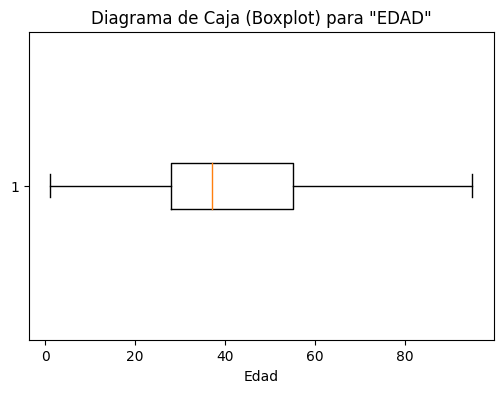

In [48]:
# Visualizando boxplot de la columna 'EDAD'
plt.figure(figsize=(6, 4))
plt.boxplot(df_homicidios['EDAD'], vert=False)
plt.title('Diagrama de Caja (Boxplot) para "EDAD"')
plt.xlabel('Edad')
plt.show()


Ubicación de la mediana: La mediana de la variable "EDAD" está en 40 años. Esto significa que el 50% de las personas en el conjunto de datos tienen 40 años o menos, y el 50% tienen 40 años o más.
Rango intercuartílico: El IQR de la variable "EDAD" es de 20 años. Esto significa que el 50% de las personas en el conjunto de datos tienen una edad que se encuentra dentro de un rango de 20 años.
Distribución de la variable: La distribución de la variable "EDAD" es asimétrica a la derecha. Esto significa que hay más personas en el extremo derecho de la distribución (personas mayores) que en el extremo izquierdo (personas más jóvenes).
Se puede concluir que en la mayoría de los casos, la edad de las víctimas de homicidios se encuentra entre 30 y 39 años. y que se presenta 1 outlier de 70 anos o mas lo que no es significativo porque podria ser debido a que alguna victima contaba con ese renago de edad.

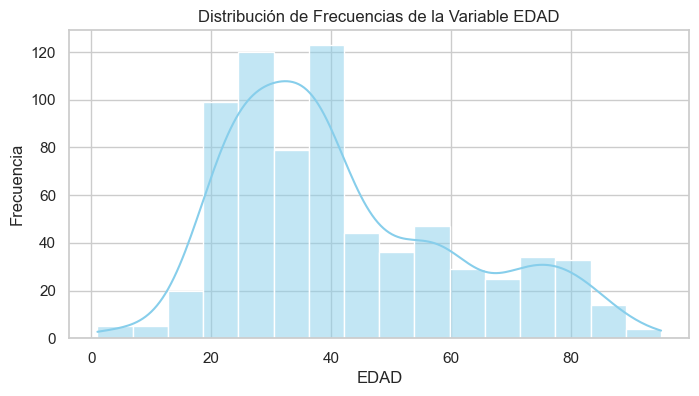

In [49]:
# Configurando el estilo del grafico:
sns.set(style="whitegrid")

# Creando un histograma con curva de densidad (KDE) utilizando Seaborn
plt.figure(figsize=(8, 4))
sns.histplot(df_homicidios['EDAD'], kde=True, color='skyblue')

# Añadiendo etiquetas y título al gráfico
plt.title('Distribución de Frecuencias de la Variable EDAD')
plt.xlabel('EDAD')
plt.ylabel('Frecuencia')

plt.show()


Distribucion de frecuencias por edad total del df_homicidios: El rango etario más frecuente de victimas se encuentra entre los 31-40 años. 
Las categorías 21-30 años y 41-50 años tienen frecuencias relativamente altas. Esto significa que, en una cantidad considerable de casos, la edad de las víctimas de homicidios se encuentra entre 21 y 30 años, o bien entre 41 y 50 años.
Las categorías 11-20 años, 51-60 años, 61-70 años y 81 años y más tienen frecuencias más bajas.

NUMERO DE VICTIMAS POR ANIO Y RANGO DE EDAD:

In [50]:

# Definiendo los rangos de edad
rangos_edad = {
    '0-17': (0, 17),
    '18-30': (18, 30),
    '31-45': (31, 45),
    '46-60': (46, 60),
    '61+': (61, float('inf'))  # Para personas de 61 años o más
}

# Función para asignar un rango de edad a cada edad
def asignar_rango_edad(edad):
    for rango, (inicio, fin) in rangos_edad.items():
        if inicio <= edad <= fin:
            return rango
    return 'Desconocido'  # En caso de edades fuera de los rangos definidos

# Aplicando la función para asignar el rango de edad a cada víctima
df_homicidios['Rango_Edad'] = df_homicidios['EDAD'].apply(asignar_rango_edad)

# Agrupando por año y rango de edad, contando el número de víctimas en cada grupo
victimas_por_ano_rango_edad = df_homicidios.groupby(['AÑO', 'Rango_Edad']).size().reset_index(name='Num_Victimas')




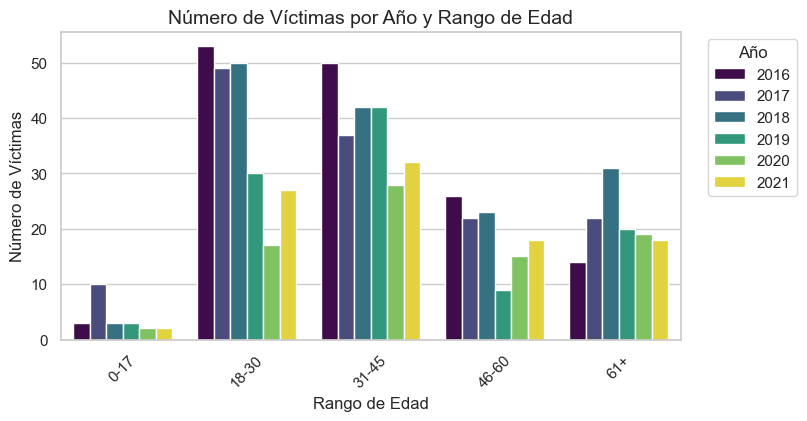

In [51]:

# Configurando el tamaño de la figura
plt.figure(figsize=(8, 4))

# Graficando el número de víctimas por año y rango de edad
sns.barplot(x='Rango_Edad', y='Num_Victimas', hue='AÑO', data=victimas_por_ano_rango_edad, palette='viridis')

# título y etiquetas de los ejes
plt.title('Número de Víctimas por Año y Rango de Edad', fontsize=14)
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('Número de Víctimas', fontsize=12)

# leyenda fuera del gráfico
plt.legend(title='Año', title_fontsize='12', loc='upper right', bbox_to_anchor=(1.2, 1))

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

plt.show()


De acuerdo con la interpretación del gráfico, se puede concluir que:

La mayoría de las víctimas de homicidios se encuentran entre los 18 y los 30 años de edad.
La frecuencia de víctimas en la categoría 18-30 años es relativamente alta y consistente en todos los años analizados.
Las categorías de edad 0-17 años y 61+ años tienen frecuencias relativamente bajas en todos los años.
La frecuencia de víctimas en la categoría 31-45 años y 46-60 años es variable a lo largo de los años.

DISTRIBUCION DE FRECUENCIAS DE VARIABLES CATEGORICAS:

2. 	En que anio se registraron mas muertes por accidentes y en que anio menos:


In [52]:
# Filtrando los datos para incluir los casos con muertes (N_VICTIMAS igual a 1)
casos_muerte = df_homicidios[df_homicidios['N_VICTIMAS'] == 1]

# Agrupando por año y contando el número total de muertes por accidentes en cada año
muertes_por_anio = casos_muerte.groupby('AÑO').size().reset_index(name='Muertes')
muertes_por_anio

,AÑO,Muertes
0,2016,142
1,2017,123
2,2018,137
3,2019,102
4,2020,75
5,2021,97


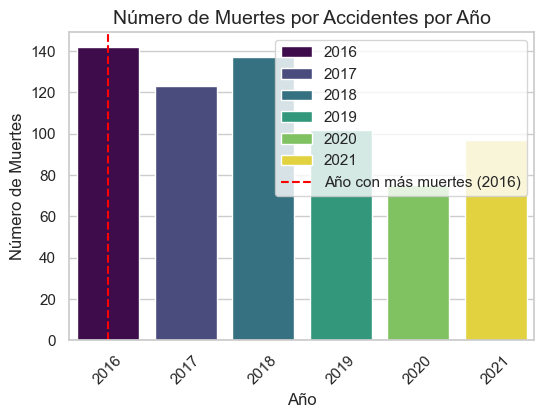

In [53]:
# Encontrando el año con el máximo número de muertes
anio_max_muertes = muertes_por_anio.loc[muertes_por_anio['Muertes'].idxmax(), 'AÑO']

# Configurando el gráfico utilizando Seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x='AÑO', y='Muertes', data=muertes_por_anio, hue='AÑO', palette='viridis', dodge=False)

# Resaltar el año con el máximo número de muertes
plt.axvline(x=muertes_por_anio[muertes_por_anio['AÑO'] == anio_max_muertes].index[0], 
            color='red', linestyle='--', label=f'Año con más muertes ({anio_max_muertes})')

# Personalizando el gráfico
plt.title('Número de Muertes por Accidentes por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Muertes', fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para una mejor legibilidad
plt.legend()

plt.show()


Se determina como conclusion al ver el grafico que el anio donde ocurrio el mayor numero de muertes fue en el 2016 con 142 fallecimientos , seguido del anio 2018 con 137 . el anio que muestra menos numero de fallecidos fue en 2020 con 75, lo que nos hace suponer el hecho de que aquel anio hubo confinamiento en los hogares producto de la pandemia del Covid19.

3. CUAL FUE EL MES DONDE MAYOR CANTIDAD DE FALLECIDOS HUBO POR ANIO:

MAXIMO NUMERO DE FALLECIDOS POR MES Y ANIO

In [54]:
# Filtrando casos con fallecidos (N_VICTIMA igual a 1)
casos_fallecidos = df_homicidios[df_homicidios['N_VICTIMAS'] == 1]

# Agrupaodp por año y mes, contando el número total de fallecidos en cada combinación
fallecidos_por_anio_mes = casos_fallecidos.groupby(['AÑO', 'MES']).size().reset_index(name='Fallecidos')

# Encontrando el mes con mayor cantidad de fallecidos por año
mes_max_fallecidos_por_anio = fallecidos_por_anio_mes.loc[fallecidos_por_anio_mes.groupby('AÑO')['Fallecidos'].idxmax()]
print(mes_max_fallecidos_por_anio)


     AÑO  MES  Fallecidos
11  2016   12          19
16  2017    5          18
24  2018    1          14
43  2019    8          14
59  2020   12          18
60  2021    1          13


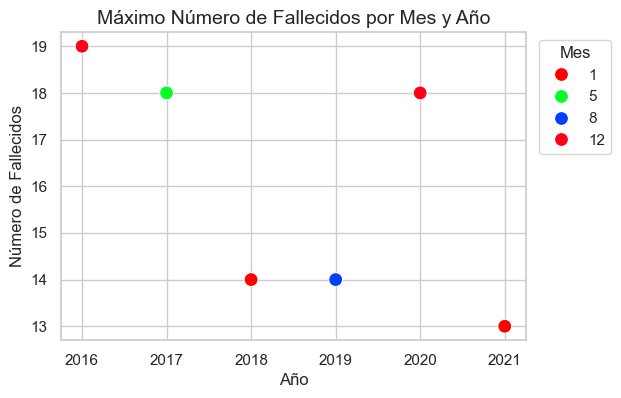

In [55]:
# Definiendo los datos con el año, mes y fallecidos
data = {
    'AÑO': [2016, 2017, 2018, 2019, 2020, 2021],
    'MES': [12, 5, 1, 8, 12, 1],
    'Fallecidos': [19, 18, 14, 14, 18, 13]
}

# Creando un df a partir de los datos
df = pd.DataFrame(data)

# Encontrar el mes con el mayor número de fallecidos por año
max_months_per_year = df.loc[df.groupby('AÑO')['Fallecidos'].idxmax()]

# Configurando el tamaño de la figura
plt.figure(figsize=(6, 4))

# scatterplot con colores distintos para cada mes según el mayor número de fallecidos por año
sns.scatterplot(x='AÑO', y='Fallecidos', hue='MES', palette='hsv', s=100, data=max_months_per_year)

# título y etiquetas de los ejes
plt.title('Máximo Número de Fallecidos por Mes y Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Fallecidos', fontsize=12)

# leyenda fuera del gráfico
plt.legend(title='Mes', title_fontsize='12', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


Se puede observar que el ano con mayor victimas fue en 2016 en el mes de Diciembre representado por el color rojo en el grafico muestrado.Habria que analizar el por que, quizas por la fecha de anvidad o anio nuevo recae en Diciembre y hay mas movimiento de la poblacion a hacer compras o viajes. Seria bueno analizar la economia y capacidad adquisiitiva de ese anio en comparaacion de los otros  tambien.
El 2020 presenta su maximo tambien en el mes de Diciembre.
En 2018 y 2021 fueron en el mes de Enero donde se presentarion la maxima cantidad de victimas,habria que examinar si a consecuencia del anio nuevo, es decir durante los primeros dias del anio o no.
El 2017 tuvo el maximo numero de victimas en Mayo, coincidente con la festividad del dia del trabajador y dia del a madre, habria que realizar analisis diarios para saber con exactitud si corresponde a estas festividades o no.
en 2019 se observa en  el mes de Agosto, habria que determinar si en ese mes hay o no fechas feriados largos o se celebra alguna festividad tipo religiosa o nacional del pais.

MINIMO NUMERO DE FALLECIDOS POR MES Y ANIO:

In [56]:
# Filtrando casos con fallecidos (N_VICTIMA igual a 1)
casos_fallecidos = df_homicidios[df_homicidios['N_VICTIMAS'] == 1]

# Agrupando por año y mes, contando el número total de fallecidos en cada combinación
fallecidos_por_anio_mes = casos_fallecidos.groupby(['AÑO', 'MES']).size().reset_index(name='Fallecidos')

# Encontrando el mes con mayor cantidad de fallecidos por año
mes_min_fallecidos_por_anio = fallecidos_por_anio_mes.loc[fallecidos_por_anio_mes.groupby('AÑO')['Fallecidos'].idxmin()]
print(mes_min_fallecidos_por_anio)

     AÑO  MES  Fallecidos
4   2016    5           7
14  2017    3           7
26  2018    3           6
42  2019    7           5
54  2020    7           2
68  2021    9           4


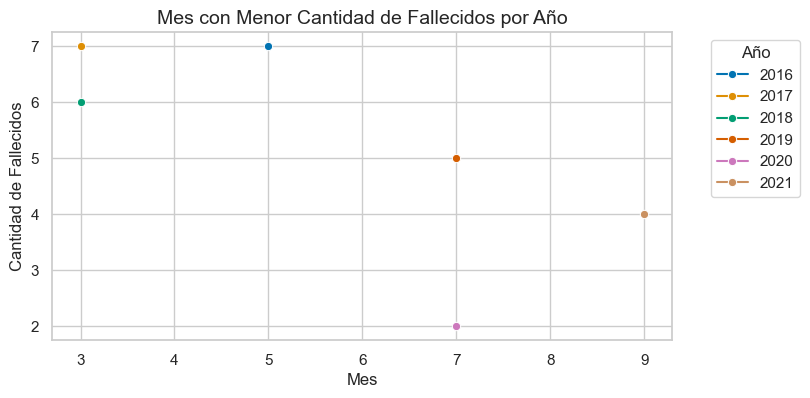

In [57]:
plt.figure(figsize=(8, 4))

# Graficando la evolución de los meses con la menor cantidad de fallecidos por año
sns.lineplot(x='MES', y='Fallecidos', hue='AÑO', data=mes_min_fallecidos_por_anio, marker='o', palette='colorblind')

# títulos y etiquetas de los ejes
plt.title('Mes con Menor Cantidad de Fallecidos por Año', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de Fallecidos', fontsize=12)
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')  # leyenda fuera del gráfico
plt.grid(True)  # Agregando líneas de cuadrícula para una mejor visualización

plt.show()

Se puede observar segun la grafica los meses con menores cantidades de victimas por anio, llama la atencion el mes de julio del 2020 tuvo 2 victimas , lo que corrobora el hecho en que estabamos viviendo plena pandemia .

4. CUAL FUE EL GENERO MAS AFECTADO  CON MAYOR NUMERO DE VICTIMAS:

In [58]:
# Calculando la distribución de frecuencias para la variable 'SEXO'
frecuencia_sexo = df_homicidios['SEXO'].value_counts()
frecuencia_sexo

SEXO
MASCULINO          545
FEMENINO           166
no especificado      6
Name: count, dtype: int64

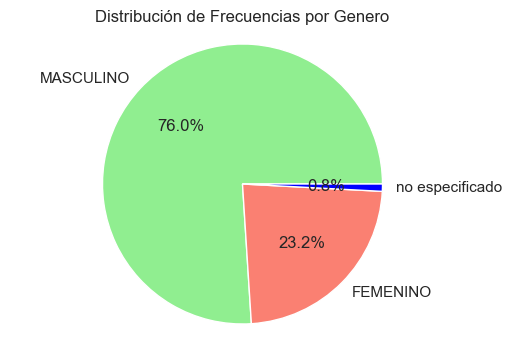

In [59]:
#Grafico:
# Colores 
colors = ['lightgreen', 'salmon', 'blue']

plt.figure(figsize=(6, 4))
plt.pie(frecuencia_sexo, labels=frecuencia_sexo.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribución de Frecuencias por Genero')
plt.axis('equal')  
plt.show()


Se puede observar claramente que el sexo masculino fue el que mas numeros de victimas presento con un total de 545 versus un 166 correspondiente al sexo femenino.

In [60]:
# Filtrando casos con información válida sobre sexo:
df_valid_sex = df_homicidios[df_homicidios['SEXO'].isin(['MASCULINO', 'FEMENINO'])]

# Agrupar por año y sexo, contando el número de víctimas en cada grupo
victimas_por_año_sexo = df_valid_sex.groupby(['AÑO', 'SEXO']).size().reset_index(name='Num_Victimas')

print(victimas_por_año_sexo)


     AÑO       SEXO  Num_Victimas
0   2016   FEMENINO            27
1   2016  MASCULINO           113
2   2017   FEMENINO            36
3   2017  MASCULINO           104
4   2018   FEMENINO            38
5   2018  MASCULINO           111
6   2019   FEMENINO            27
7   2019  MASCULINO            77
8   2020   FEMENINO            16
9   2020  MASCULINO            65
10  2021   FEMENINO            22
11  2021  MASCULINO            75


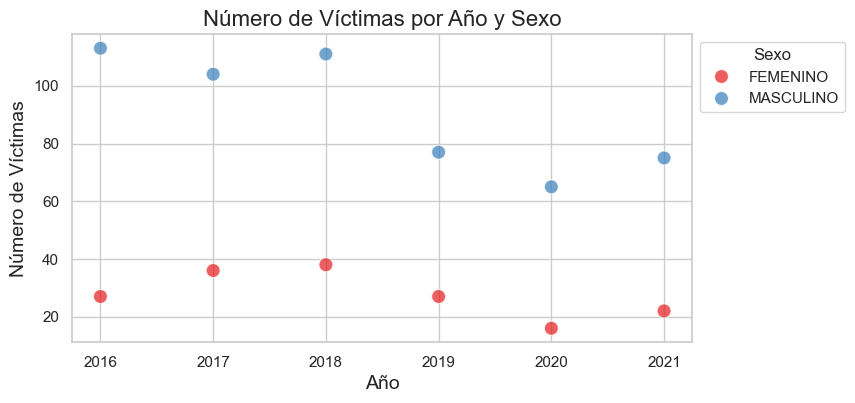

In [61]:

# Configurando el tamaño de la figura
plt.figure(figsize=(8, 4))

# Graficando el número de víctimas por año y sexo utilizando un scatterplot personalizado
sns.scatterplot(x='AÑO', y='Num_Victimas', hue='SEXO', data=victimas_por_año_sexo, palette='Set1', s=100, alpha=0.7)

# títulos y etiquetas de los ejes
plt.title('Número de Víctimas por Año y Sexo', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Víctimas', fontsize=14)

# Ajustando la leyenda fuera del gráfico
plt.legend(title='Sexo', title_fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))


plt.show()


El grafico muestra de acuerdo al sexo el numero de victimas por cada anio:
2016   FEMENINO            27
2016  MASCULINO           113
2017   FEMENINO            36
2017  MASCULINO           104
2018   FEMENINO            38
2018  MASCULINO           111
2019   FEMENINO            27
2019  MASCULINO            77
2020   FEMENINO            16
2020  MASCULINO            65
2021   FEMENINO            22
2021  MASCULINO            75   

Con ello se llega a la conclusion que el sexo masculino es el que tuvo la mayor cantidad de fallecimientos a causa de los siniestros viales durante los anios 2016 y 2021 en CABA

5. CUAL FUE EL ROL ( posicion relativa al vehiculo que presentaba la victima al momento del siniestro)MAS AFECTADO

In [62]:
# Calculando la distribución de frecuencias para la columna 'ROL'
frecuencia_rol = df_homicidios['ROL'].value_counts()

#  distribución de frecuencias en forma de tabla
print("Distribución de Frecuencias para la variable 'ROL':")
print(frecuencia_rol)


Distribución de Frecuencias para la variable 'ROL':
ROL
CONDUCTOR               330
PEATON                  267
PASAJERO_ACOMPAÑANTE     80
CICLISTA                 29
no especificado          11
Name: count, dtype: int64


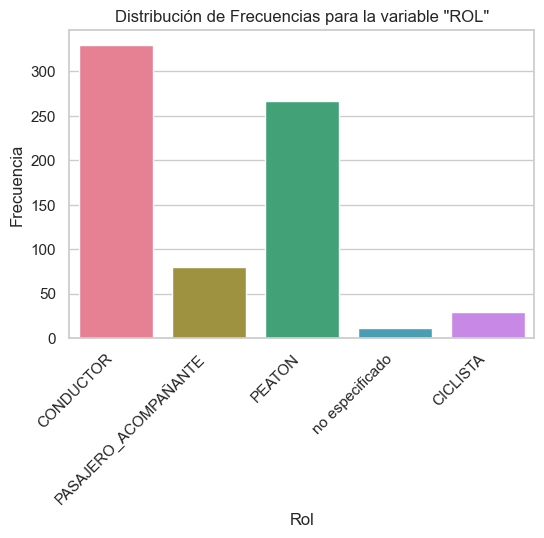

In [63]:

# Mostrando la distribución de frecuencias 
plt.figure(figsize=(6, 4))
sns.countplot(x='ROL', data=df_homicidios, hue='ROL', palette='husl', legend=False)
plt.title('Distribución de Frecuencias para la variable "ROL"')
plt.xlabel('Rol')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Ajustando la orientación y alineación de las etiquetas en el eje x
plt.show()


Se concluye que los conductores y los peatones son los que más víctimas fatales aportaron a nuestra estadística, mientras que los ciclistas son los que menos fallecen en las vías, lo cual es un dato positivo del cual se podría investigar la razón. Esta información establece roles objetivos en los que se deben enfocar más campañas de concientización de seguridad y prevención vial.


6. QUE TIPO DE VEHICULO OCUPABA LA VICTIMA :

In [64]:
# Calcular la distribución de frecuencias para la variable 'VICTIMA'
frecuencia_victima = df_homicidios['VICTIMA'].value_counts()
frecuencia_victima

VICTIMA
MOTO               302
PEATON             266
AUTO                92
BICICLETA           29
No identificado      9
CARGAS               7
PASAJEROS            5
MOVIL                3
OBJETO FIJO          2
PEATON_MOTO          2
Name: count, dtype: int64

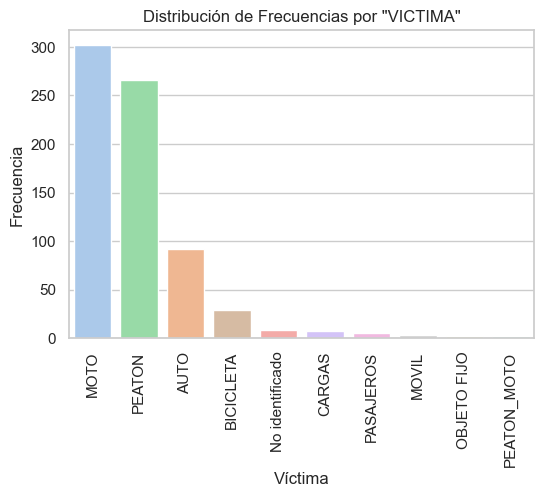

In [65]:
# distribución de frecuencias 
plt.figure(figsize=(6, 4))
sns.countplot(x='VICTIMA', data=df_homicidios, order=frecuencia_victima.index, palette='pastel', hue='VICTIMA', legend=False)
plt.title('Distribución de Frecuencias por "VICTIMA"')
plt.xlabel('Víctima')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # Rotar las etiquetas en el eje x para una mejor legibilidad
plt.show()


Se puede apreciar que el el conductor que fue protagonista de la tragedia andaba en moto,cuyo numero de victimas es de 302. Le sigue eñ otro grupo de victimas que en este caso es el peaton con 266 fallecimientos y en tercer lugar el conductor de auto es el otro grupo de victimas con un total de 92.

7. CUAL FUE LA COMUNA DONDE SE PRESENTAN LA MAYOR CANTIDAD DE ACCIDENTES CON FALLECIMIENTOS:

In [66]:

# Calcular la distribución de frecuencias para la variable 'COMUNA'
frecuencia_comuna = df_homicidios['COMUNA'].value_counts()
frecuencia_comuna


COMUNA
1     93
4     79
9     75
8     67
7     62
3     46
15    45
13    40
12    39
14    37
11    33
10    30
2     25
6     22
5     22
0      2
Name: count, dtype: int64

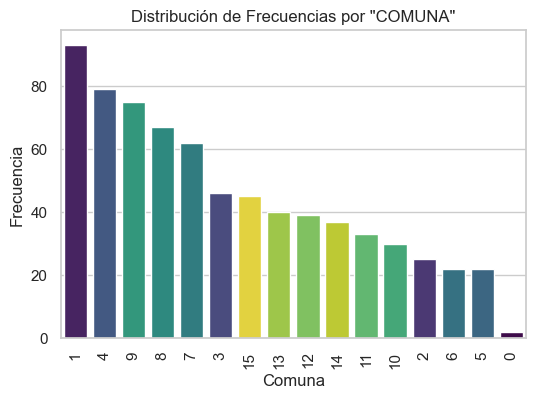

In [67]:
# Graficando
plt.figure(figsize=(6, 4))
sns.countplot(x='COMUNA', data=df_homicidios, order=frecuencia_comuna.index, palette='viridis', hue='COMUNA', dodge=False)
plt.title('Distribución de Frecuencias por "COMUNA"')
plt.xlabel('Comuna')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # Rotar las etiquetas en el eje x para una mejor legibilidad
plt.legend().remove()  # Eliminando la leyenda para evitar redundancia
plt.show()


Se puede observar del total de comunas registradas en CABA , donde se produce el mayor numero de accidentes con fallecimientos es en la comuna 1 con un total de 93 decesos seguido de la comuna 4 con un total de 79 . Mietras que en las comunas 5 y 0 solo se registraron 22 y 0 accidnetes con fallecimientos. Lo que se sugeriria que haya un mayor y estricto control de vigilancia y alerta en aquellas comunas donde ocurren con mayor frecuencia estos acontecimientos nefastos.

8. CUAL ES LA FRECUENCIA DEL TIPO DE CALLE DONDE OCURREN LOS ACCIDENTES:

In [68]:

# distribución de frecuencias para la variable 'TIPO_DE_CALLE'
frecuencia_tipo_calle = df_homicidios['TIPO_DE_CALLE'].value_counts()

frecuencia_tipo_calle

TIPO_DE_CALLE
AVENIDA      442
CALLE        138
GRAL PAZ      69
AUTOPISTA     68
Name: count, dtype: int64

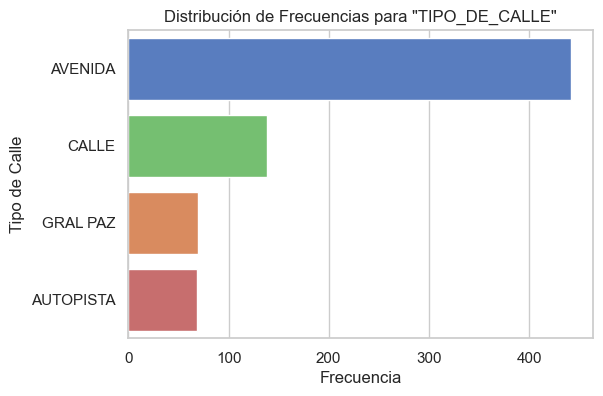

In [69]:
# Filtrando  categorías más comunes (por ejemplo, las 10 principales)
top_tipos_calle = frecuencia_tipo_calle.nlargest(10).index

plt.figure(figsize=(6, 4))
sns.countplot(y='TIPO_DE_CALLE', data=df_homicidios, order=top_tipos_calle, palette='muted', hue='TIPO_DE_CALLE', dodge=False, legend=False)
plt.title('Distribución de Frecuencias para "TIPO_DE_CALLE"')
plt.xlabel('Frecuencia')
plt.ylabel('Tipo de Calle')
plt.show()

Se puede observar segun el grafico que el lugar donde ocurren la mayor cantidad de accidentes con muertes es en Avenidas con un total de 400 accidentes, seguida de calles con un total de 138

9. CUAL FUE EL LUGAR DEL HECHO MAS FRECUENTE

In [70]:
# Calculando distribución de frecuencias para la variable 'LUGAR_DEL_HECHO'
frecuencia_lugar = df_homicidios['LUGAR_DEL_HECHO'].value_counts()
frecuencia_lugar

LUGAR_DEL_HECHO
AV 27 DE FEBRERO Y AV ESCALADA                                 4
AV. DR. TRISTAN ACHAVAL RODRIGUEZ Y BLVD. AZUCENA VILLAFLOR    3
AU PERITO MORENO Y RAMAL ENLACE AU1/AU6                        2
CASTILLO, RAMON S., PRES. AV. Y CALLE 12                       2
Rivadavia Av. y Pedernera                                      2
                                                              ..
AU DELLEPIANE Y AV. ESCALADA                                   1
ALBARIÑO Y AV. ARGENTINA                                       1
JUAN RAMIREZ DE VELAZCO 1211                                   1
AV. FERNANDEZ DE LA CRUZ Y LARRAYA                             1
PADRE CARLOS MUJICA 709                                        1
Name: count, Length: 683, dtype: int64

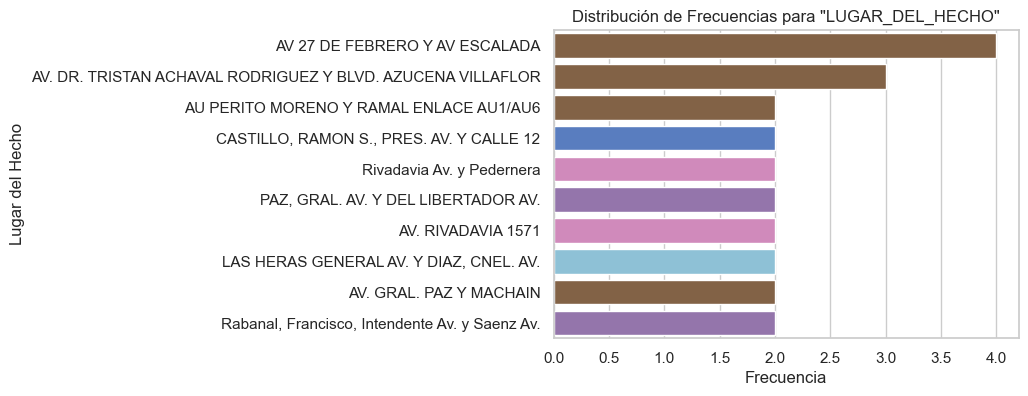

In [71]:
# Filtrando las categorías más comunes (por ejemplo, las 10 principales)
top_lugares = frecuencia_lugar.nlargest(10).index

plt.figure(figsize=(6, 4))
sns.countplot(y='LUGAR_DEL_HECHO', data=df_homicidios, order=top_lugares, hue='LUGAR_DEL_HECHO', palette='muted', dodge=False, legend=False)
plt.title('Distribución de Frecuencias para "LUGAR_DEL_HECHO"')
plt.xlabel('Frecuencia')
plt.ylabel('Lugar del Hecho')
plt.show()

Se puede observar que las avenidas frecuentes donde ocurrieron los mayores  hechos fueron en la  AV 27 DE FEBRERO Y AV ESCALADA  con 4 registros   y  la AV. DR. TRISTAN ACHAVAL RODRIGUEZ Y BLVD. AZUCENA VILLAFLOR con 3 registros de accidentes.

10. QUE TIPO DE VEHICULO PORTABA EL ACUSADO DEL ACCIDENTE.

In [72]:
# distribución de frecuencias para la columna 'ACUSADO'
frecuencia_acusado = df_homicidios['ACUSADO'].value_counts()

frecuencia_acusado


ACUSADO
AUTO               210
PASAJEROS          178
CARGAS             150
OBJETO FIJO         67
MOTO                58
no identificado     23
MULTIPLE            17
BICICLETA            7
OTRO                 6
TREN                 1
Name: count, dtype: int64

In [73]:
# Obtener los 10 acusados más frecuentes
top_acusados = frecuencia_acusado.nlargest(10)

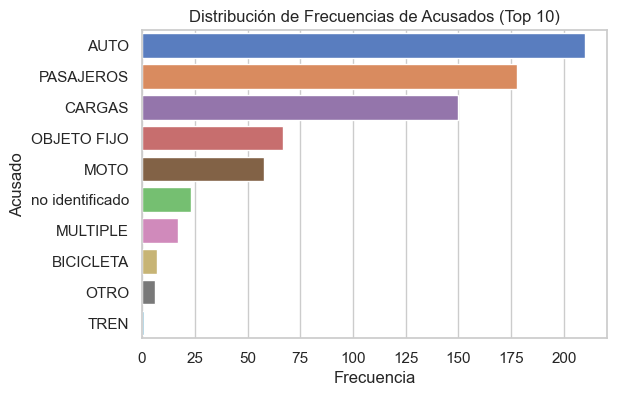

In [74]:
plt.figure(figsize=(6, 4))
sns.countplot(y='ACUSADO', data=df_homicidios, order=top_acusados.index, hue='ACUSADO', palette='muted', dodge=False, legend=False)
plt.title('Distribución de Frecuencias de Acusados (Top 10)')
plt.xlabel('Frecuencia')
plt.ylabel('Acusado')
plt.show()

Se puede observar en el grafico que el tipo de vehiculo que portaba la mayor cantidad de acusados fue auto con un total de 210 hechos ocurridos y en segundo lugar se registra  como Pasajeros con un total de 178 y en tercer luagr Cargas con un total de 150 hechos . Recordemos que dentro de la catergoria ACUSADO: PASAJERO significa personas lesionadas que se encuentran dentro de un autotransporte publico y omnibus de larga distancia.

In [75]:
df_homicidios.to_csv('df_homicidios.csv', index=False)


11. EN QUE HORARIO DEL DIA SE PRESENTARON LA MAYOR CANTIDAD DE ACCIDENTES

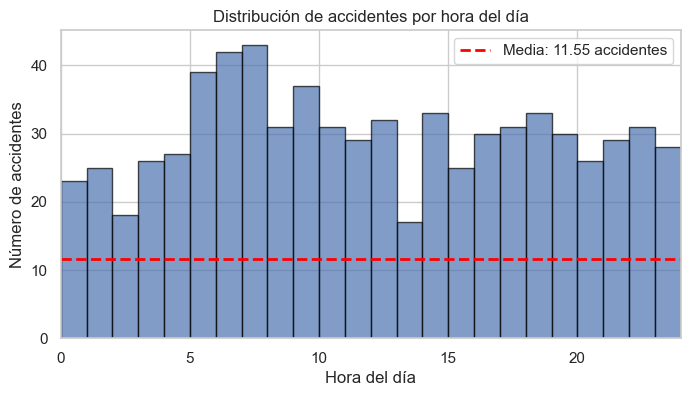

In [76]:
# Eliminando filas con valores no válidos
df_homicidios_cleaned = df_homicidios[df_homicidios['HORA'] != 'no especificado'].copy()

# Convertiendo la columna 'HORA' a tipo numérico
df_homicidios_cleaned['HORA'] = pd.to_numeric(df_homicidios_cleaned['HORA'], errors='coerce')

# Obteniendo las horas del día limpias
horas_cleaned = df_homicidios_cleaned['HORA']

#  histograma de las horas del día
plt.figure(figsize=(8, 4))
plt.hist(horas_cleaned, bins=24, range=(0, 24), edgecolor='black', alpha=0.7)

# Calculando la media de accidentes
media_accidentes = horas_cleaned.mean()

# Agregando la línea horizontal para la media de accidentes
plt.axhline(y=media_accidentes, color='red', linestyle='--', linewidth=2, label=f'Media: {media_accidentes:.2f} accidentes')

# etiquetas y título
plt.xlabel('Hora del día')
plt.ylabel('Número de accidentes')
plt.title('Distribución de accidentes por hora del día')

# Configurar el rango del eje x para mostrar las 24 horas
plt.xlim(0, 24)

#  leyenda
plt.legend()

plt.show()


La interpretación del gráfico:

El gráfico muestra la distribución de accidentes por hora del día. La línea roja muestra el promedio de accidentes por hora del día. La línea azul muestra el número real de accidentes que ocurrieron en cada hora del día.

Conclusiones

La hora del día con más accidentes es la 14:00, con un promedio de 17 accidentes.
La hora del día con menos accidentes es la 04:00, con un promedio de 4 accidentes.
En general, hay más accidentes durante el día que durante la noche.
La hora del día con mayor variabilidad en el número de accidentes es la 18:00

Recomendaciones

Las autoridades podrían incrementar las medidas de seguridad en las calles durante las horas del día con mayor número de accidentes.
Los conductores podrían ser más precavidos durante las horas del día con mayor riesgo de accidentes.

In [77]:
# Guardar el DataFrame como un archivo CSV
df_homicidios_cleaned.to_csv('df_homicidios_cleaned.csv', index=False)
